In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load farsi chars
import pickle
filehandler = open("farsichar.obj", 'rb') 
farsi_chars = pickle.load(filehandler)
farsi_chars

['ا',
 'ب',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'پ',
 'چ',
 'ژ',
 'ک',
 'گ',
 'ی']

In [19]:
df = pd.read_csv("documentword.csv" , header=None)
df.head()

,0,1
0,0,307 0 48 132 200 57 246 1064 1065 230 231 33 0...
1,1,307 0 48 132 200 57 246 1064 1065 230 231 33 0...
2,2,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...
3,3,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...
4,4,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
bow={}
i=0

In [ ]:
farsi_char_support = 0.65

chunk_size=2000

In [ ]:
dfnumber=1
path = "../Data/Telegram/exportData98{}/corona98{}/telegram_corona98{}_full.csv".format(dfnumber,dfnumber,dfnumber)

In [15]:
from parsivar import FindStems

def count_char_inlist(l , charlist):
    res = 0.0
    for c in l:
        res += 1 if c in charlist else 0
    return res/len(l)

def delete_out_of_char_words(l , cs):
    my_stemmer = FindStems()
    te = []
    for w in l.split():
        is_in_char = True
        for c in w:
            if c not in cs:
                is_in_char=False
                break
            if(not is_in_char):
                break
        if(is_in_char):
            te.append(my_stemmer.convert_to_stem(w))
    return te

# def tokenize_word(l ,bow , i):
#     te=[]
#     for w in l:
#         if w not in bow:
#             bow[w] = i
#             i+=1
#         te+="{} ".format(bow[w])

def documentWord(dfnumber , chunksize , char_set , char_support , bow={}):
    path = "../Data/Telegram/exportData98{}/corona98{}/telegram_corona98{}_full.csv".format(dfnumber,dfnumber,dfnumber)
    df =pd.read_csv(path , chunksize=chunksize)
    for chunk in df:
        print(len(chunk))
        t=time.time()
        chunk['normalText'] = chunk['textField_normal'].apply(lambda l : l.replace('"' , '') if count_char_inlist(l, char_set)>char_support else "")
        chunk = chunk[chunk['normalText']!=""]
        print(t-time.time())
        t = time.time()
        print(len(chunk))
        chunk['words'] =chunk['normalText'].apply(lambda l : delete_out_of_char_words(l , char_set))
        print(t-time.time())
        t = time.time()
        chunk.to_csv("Fulldocumentword{}.csv".format(dfnumber) , mode='a' , header=False)
        print(t-time.time())

In [46]:
documentWord(2,1000000,farsi_chars,0.70)

258831
-23.458878993988037
182511
-1572.7685072422028
-8.644532442092896


In [47]:
df = pd.read_csv("Fulldocumentword2.csv" , header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,"""""","""""","""""",1470337707,"""""",1470337707_6684,"""""","""کرونا کرونا کرونا""","""کرونا کرونا کرونا""",1398-11-13 20:40:13,1580663413,"""1""",کرونا کرونا کرونا,"['کرونا', 'کرونا', 'کرونا']"
1,2,2,"""""","""یارانه""","""""",1462058741,"""""",1462058741_58843,"""ابراز علاقه""","""‌ ‌ ‌‌‌ ‌ کرونا کرونا ~~~~ چی میگی میگم دوست ...","""کرونا کرونا چی میگی میگم دوست دارم چصو کرونا ...",1398-11-18 20:39:02,1581095342,"""2""",کرونا کرونا چی میگی میگم دوست دارم چصو کرونا ک...,"['کرونا', 'کرونا', 'چی', 'میگ', 'میگ', 'دوست',..."
2,3,3,"""""","""""","""""",1497732081,"""""",1497732081_549,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا.""","""کرونا اینجا کرونا اونجا کرونا همه جا""",1398-11-14 16:47:33,1580735853,"""57""",کرونا اینجا کرونا اونجا کرونا همه جا,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
3,4,4,"""""","""""","""""",1022917137,"""ranginak97""",1022917137_116487,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-12 14:49:57,1580555997,"""168""",کرونا اینجا کرونا اونجا کرونا همه جا ازمایش وا...,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
4,5,5,"""""","""""","""""",1204349583,"""""",1204349583_6792,"""حالت تهوع""","""‏-وای چقدر سرم درد می کنه +کرونا گرفتی -حالت ...","""وای چقدر سرم درد می کنه کرونا گرفتی حالت تهوع...",1398-11-14 13:25:34,1580723734,"""8""",وای چقدر سرم درد می کنه کرونا گرفتی حالت تهوع ...,"['وای', 'چقدر', 'سرم', 'درد', 'می', 'کنه', 'کر..."


In [23]:
df[df.columns[-1]]

0        ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
1        ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
2        ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
3        ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
4        ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
                               ...                        
96018    ['پربیننده', 'تر', 'خبر', 'مهم', 'خبر', 'مغلطه...
96019    ['سیاست', 'خارجی', 'کشور', 'و', 'ای', 'برجام',...
96020    ['هیچ', 'ستاره', 'ای', 'در', 'اسم', 'هتل', 'صخ...
96021    ['سلطان', 'سازه', 'ها', 'تصاویرساخت', 'سریع', ...
96022    ['تامل', 'پرانکان', 'او', 'طالبان', 'نصیب', 'ح...
Name: ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', 'همه', 'جا', 'ازمایش', 'واکسن', 'قطعی', 'کرونا', 'برای', 'اولین', 'بار', 'در', 'زودنیوز'], Length: 96023, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
df.head()

,0,1
0,0,307 0 48 132 200 57 246 1064 1065 230 231 33 0...
1,1,307 0 48 132 200 57 246 1064 1065 230 231 33 0...
2,2,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...
3,3,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...
4,4,1016 315 168 0 1177 49 264 50 0 47 48 914 262 ...


In [48]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df[df.columns[-1]])

In [49]:
X_train_counts

<182511x50549 sparse matrix of type '<class 'numpy.int64'>'
	with 10192989 stored elements in Compressed Sparse Row format>

In [60]:
from sklearn.cluster import KMeans
nc=12
#losses = []
for nc in range(20,40):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(X_train_counts)

    losses.append((nc,kmeans.score(X_train_counts)))

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

In [52]:
import random
l=random.sample(list(df.index),50)
pred=kmeans.predict(count_vect.transform([df.iloc[x][df.columns[-1]] for x in l]))

for i in range(nc):
    print("-------------------cluster : {}-------------------".format(i))
    for c in range(len(pred)):
        if pred[c]==i:
            print(df.iloc[l[c]][10])
            print("------")

-------------------cluster : 0-------------------
"تعیین محل قرنطینه برای بازگشت دانشجویان ایرانی از چین استاندار تهران در خصوص ویروس کرونا گفت تاکنون موردی از ابتلا به این ویروس در کشور نداشتیم اما این ویروس خطرناکی است و باید امادگی لازم را داشته باشیم روز گذشته برای بازگشت دانشجویان ایرانی از چین جلسه ای در استانداری تهران برگزار و تمهیداتی برای قرنطینه این دانشجویان اندیشیده شده است تا در صورت وجود مورد مشکوک نسبت به درمان انها اقدام شود منبع خبر ملیت ضریب نفوذ منبع 6 10 دیگر منابع منتشر کننده 24 منبع دیگر بازدید 138 000 کلمات کلیدی هوشمند کاهش الودگی هوا بازگشت دانشجویان ایرانی محسنی بندپی نرخ بیکاری استان تهران استانداری تهران استان ها استاندار تهران محدوده شهرها استان http meliyat com fa news 305318 تعیین محل قرنطینه برای بازگشت دانشجویان ایرانی از چین"
------
"نگرانی ها از احتمال عدم توانایی چین در تحقق توافق فاز اول تجاری روز به روز بیشتر میشود در همین حال امریکایی ها پیش دستی کرده و گفته اند معافیت تعرفه ای جدیدی در نظر گرفته نخواهد شد امریکا سالانه به مبلغ 540 میلیارد دلار ا

In [53]:
pred=kmeans.predict(X_train_counts)

(array([24323.,  3080., 56245.,  1359.,  4297.,  5338.,   551., 69598.,
         8420.,  9300.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

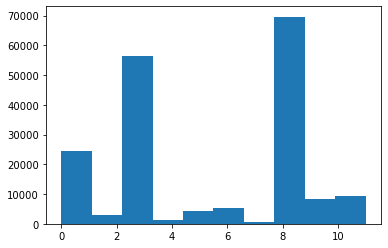

In [55]:
plt.hist(pred)

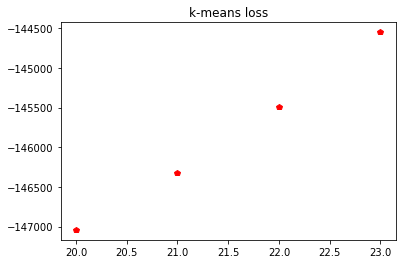

In [107]:
plt.title("k-means loss")
plt.plot([x[0] for x in losses] , [x[1] for x in losses] , 'rp')
plt.show()

## TF-IDF

In [94]:
#load stop words
import codecs

from hazm import Normalizer
l = []
with  open('persian-stopwords-master/persian', encoding='utf-8') as f:
    for w in f.readlines():
        l.append(w.replace('\n',''))


len(l)

1316

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000 , stop_words=l)
X = vectorizer.fit_transform(df[df.columns[-1]] )

In [98]:
print(vectorizer.get_feature_names())

['اب', 'ابتلا', 'اثر', 'احتمال', 'ادامه', 'ازمایش', 'اس', 'استان', 'اصفهان', 'اضطرار', 'اطلاع', 'اطلاعیه', 'افراد', 'افزایش', 'اقتصاد', 'اقتصادی', 'الله', 'اماده', 'امار', 'امام', 'امریکا', 'اموزش', 'امکان', 'انتشار', 'انتقال', 'انسان', 'اهمیت', 'ایجاد', 'ایران', 'ایرانی', 'ایمنی', 'بازار', 'باعث', 'بدن', 'برد', 'بستری', 'بهداشت', 'بهداشتی', 'بهمن', 'بیمار', 'بیمارستان', 'بیماری', 'تاثیر', 'تایید', 'تب', 'تحریم', 'ترس', 'تشخیص', 'تعداد', 'تلگرام', 'تن', 'تهران', 'توجه', 'توصیه', 'تولید', 'تک', 'ثانیه', 'جامعه', 'جان', 'جدی', 'جمعیت', 'جمله', 'جهان', 'جهانی', 'خانگی', 'خبر', 'خبری', 'خطرناک', 'خفاش', 'خودداری', 'خور', 'خورد', 'خون', 'داره', 'دارو', 'داغ', 'دان', 'دانشجو', 'دانشگاه', 'درصد', 'درمان', 'دست', 'دلار', 'دلیل', 'دنیا', 'دوست', 'دولت', 'دکتر', 'دید', 'دیدن', 'رابطه', 'رس', 'رسان', 'رساند', 'رسانه', 'رعایت', 'رییس', 'زد', 'زن', 'ساخت', 'سازمان', 'ساعت', 'سال', 'سرفه', 'سلامت', 'سه', 'سیستم', 'شبکه', 'شخصی', 'شرایط', 'شرکت', 'شست', 'شمار', 'شناسایی', 'شهر', 'شهروند', 'شک', 'شیوع

In [65]:
import random
l=random.sample(list(df.index),50)
pred=vectorizer.transform([df.iloc[x][df.columns[-1]] for x in l])
pred

<50x50549 sparse matrix of type '<class 'numpy.float64'>'
	with 2455 stored elements in Compressed Sparse Row format>

In [100]:
X

<182511x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4327018 stored elements in Compressed Sparse Row format>

In [105]:
from sklearn.cluster import KMeans
nc=12
losses = []
for nc in range(20,40):
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)

    losses.append((nc,kmeans.score(X)))

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

In [103]:
kmeans.score(X)

-147042.6632972136

In [104]:
import random
l=random.sample(list(df.index),50)
pred=kmeans.predict(vectorizer.transform([df.iloc[x][df.columns[-1]] for x in l]))

for i in range(nc):
    print("-------------------cluster : {}-------------------".format(i))
    for c in range(len(pred)):
        if pred[c]==i:
            print(df.iloc[l[c]][10])
            print("------")

-------------------cluster : 0-------------------
-------------------cluster : 1-------------------
"1 اگر مبتلا به ویروس کرونا شدیم چکار کنیم 2 چکار کنیم تا به ویروس کرونا مبتلا نشویم 3 درصورت برخورد باکسی که به ویروس کرونا مبتلا است چه کنیم 4 اگریکی از اعضای خانواده مبتلا به ویروس کرونا شد چکار کنیم جواب این همه سوال ها در تصویر بالا لطفا بادقت بخوانید وبه اشتراک بگذارید ghuryan herat کانال غوریان هرات"
------
"کرونا موجب قرنطینه شدن حدود 4 هزار نفر در ژاپن شد مقامات ژاپنی روز سه شنبه اعلام کردند یک کشتی گردشگری با 3 هزار و 700 خدمه و مسافر را به دلیل مشاهده یک مورد ابتلا به ویروس کرونا در یک مرد هنگ کنگی در ان قرنطینه کرده اند باشگاه خبرنگاران akhbardaq"
------
"بابا این ویروس کرونا همون سرماخوردگی خودمونه اونا جنسشون چینیه زود میمیرن"
------
"این روزها چینی ها را به جهت خوردن برخی حیوانات که ظاهرا باعث شیوع کرونا شده ملامت میکنیم که شاید هم از سر فقر باشد اینجا هتل والدورف استوریای نیویورک است ملاحظه کنید شیک پوشان نیویورکی در میهمانی شام پر شکوه شان چه میل می فرمایند کانال سجادیه 

In [106]:
nc

24

In [108]:
pred=kmeans.predict(X)

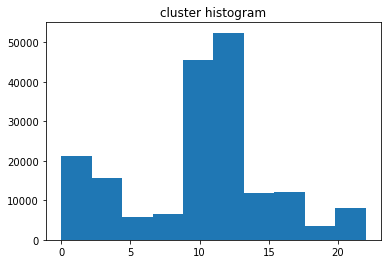

In [111]:
plt.title("cluster histogram")
plt.hist(pred)
plt.show()

## better clustering methods

In [115]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN().fit(X)

In [118]:
clustering.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [120]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [121]:
n_clusters_ , n_noise_

(3701, 29913)

In [123]:
X.shape

(182511, 1000)

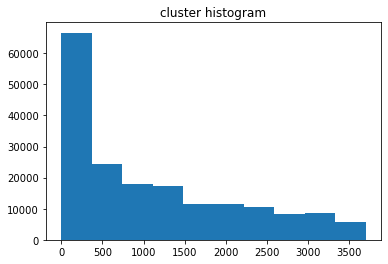

In [126]:
plt.title("cluster histogram DBSCAN")
plt.hist(labels)
plt.show()

In [128]:
import random
l=random.sample(list(df.index),100)
pred=[labels[x] for x in l]

for i in range(n_clusters_):
    print("-------------------cluster : {}-------------------".format(i))
    for c in range(len(pred)):
        if pred[c]==i:
            print(df.iloc[l[c]][10])
            print("------")

-------------------cluster : 0-------------------
"لف بدین یوقت کرونا میگیرین تو چنل"
------
-------------------cluster : 1-------------------
-------------------cluster : 2-------------------
-------------------cluster : 3-------------------
-------------------cluster : 4-------------------
-------------------cluster : 5-------------------
-------------------cluster : 6-------------------
-------------------cluster : 7-------------------
-------------------cluster : 8-------------------
-------------------cluster : 9-------------------
-------------------cluster : 10-------------------
"ایا ویروس کرونا صنعت خودروسازی جهان را تهدید میکند کرونا ویروس کرونا کرونا ویروس خودروسازی صنعت خودروسازی قطعه سازی قطعه سازان خودروسازی جهان بحران اقتصاد اقتصادی اقتصاد ایران ایران اکوایران mirft 1"
------
-------------------cluster : 11-------------------
-------------------cluster : 12-------------------
-------------------cluster : 13-------------------
-------------------cluster : 14--------------

-------------------cluster : 2530-------------------
-------------------cluster : 2531-------------------
-------------------cluster : 2532-------------------
-------------------cluster : 2533-------------------
-------------------cluster : 2534-------------------
-------------------cluster : 2535-------------------
-------------------cluster : 2536-------------------
-------------------cluster : 2537-------------------
-------------------cluster : 2538-------------------
-------------------cluster : 2539-------------------
-------------------cluster : 2540-------------------
-------------------cluster : 2541-------------------
-------------------cluster : 2542-------------------
-------------------cluster : 2543-------------------
-------------------cluster : 2544-------------------
-------------------cluster : 2545-------------------
-------------------cluster : 2546-------------------
-------------------cluster : 2547-------------------
-------------------cluster : 2548-------------